In [3]:
import numpy as np
import time
import matplotlib.pyplot as plt
import subprocess

from utils import init_nodes
from spam_cluster import get_response_latenices

from pod_controller import get_loadbalancer_external_port

interval = 500
rps = 20
random_rps = True
every = 3
initial_rps = rps

upper_rps = 60
lower_rps = 30

url = f"http://localhost:{get_loadbalancer_external_port(service_name='ingress-nginx-controller')}"
USERS = 5
recordings = 10
time_step = 5

nodes = init_nodes(debug=True, custom_label='app=localization-api')

Observable pods/nodes:
e6-orancloud:193.2.205.13, ca: 10.1.28.195, pods: []
raspberrypi2:193.2.205.183, ca: 10.1.225.1, pods: [('localization-api2', 'localization-api', '10.1.225.8')]
raspberrypi1:193.2.205.192, ca: 10.1.245.4, pods: [('localization-api3', 'localization-api', '10.1.245.10'), ('localization-api1', 'localization-api', '10.1.245.9')]



In [4]:
apis = 3

Scaling is run by a `.py` script

MADQN

In [7]:
# spam_process = subprocess.Popen(['python', 'spam_cluster.py', '--users', str(rps), '--interval', str(interval), '--variable'])
command = ['python', 'spam_cluster.py', '--users', str(rps), '--interval', str(interval), '--all'] # without variable because we dont want variability, we are evaluating
spam_process = subprocess.Popen(command)
mdqn_latenices = []
mdqn_container_recordings = []
for i in range(recordings):
    start_time = time.time()
    # latencies = get_response_latenices(USERS, url)
    # latencies = [latency for latency in latencies if latency is not None]
    latencies = [np.mean([latency if latency is not None else 2 for latency in get_response_latenices(USERS, f'{url}/api{api_id}/predict')]) for api_id in range(1, apis + 1)]

    mean_latency = np.mean(latencies)
    mdqn_latenices.append(mean_latency)

    node_recordings = []
    for node in nodes:
        for container_id, (_, _, _) in list(node.get_containers().items()):
            (cpu_limit, cpu, cpu_percentage), (_, _, _), (_, _), _ = node.get_container_usage(container_id)
            node_recordings.append((cpu_limit, cpu, cpu_percentage))
    mdqn_container_recordings.append(node_recordings)

    elapsed_time = time.time() - start_time
    time.sleep(max(0, time_step - elapsed_time))

    # if random_rps and i % every == 0 and i != 0:
    #     rps = np.random.randint(lower_rps, upper_rps)
    #     spam_process.terminate()
    #     spam_process = subprocess.Popen(['python', 'spam_cluster.py', '--users', str(rps), '--interval', str(interval), '--variable'])
spam_process.terminate()

Loading the cluster with 20 users on http://localhost:31923/api1/predict
Loading the cluster with 20 users on http://localhost:31923/api2/predict
Loading the cluster with 20 users on http://localhost:31923/api3/predict


Thresholding

In [6]:
if random_rps:
    rps = initial_rps

# spam_process = subprocess.Popen(['python', 'spam_cluster.py', '--users', str(rps), '--interval', str(interval), '--variable'])
command = ['python', 'spam_cluster.py', '--users', str(rps), '--interval', str(interval), '--all'] # without variable because we dont want variability, we are evaluating
spam_process = subprocess.Popen(command)
t_latencies = []
t_container_recordings = []
for i in range(recordings):
    start_time = time.time()
    # latencies = get_response_latenices(USERS, url)
    # latencies = [latency for latency in latencies if latency is not None]
    latencies = [np.mean([latency if latency is not None else 2 for latency in get_response_latenices(USERS, f'{url}/api{api_id}/predict')]) for api_id in range(1, apis + 1)]
    
    mean_latency = np.mean(latencies)
    t_latencies.append(mean_latency)

    node_recordings = []
    for node in nodes:
        for container_id, (_, _, _) in list(node.get_containers().items()):
            (cpu_limit, cpu, cpu_percentage), (_, _, _), (_, _), _ = node.get_container_usage(container_id)
            node_recordings.append((cpu_limit, cpu, cpu_percentage))
    t_container_recordings.append(node_recordings)
    
    elapsed_time = time.time() - start_time
    time.sleep(max(0, time_step - elapsed_time))

    # if random_rps and i % every == 0 and i != 0:
    #     rps = np.random.randint(lower_rps, upper_rps)
    #     spam_process.terminate()
    #     spam_process = subprocess.Popen(['python', 'spam_cluster.py', '--users', str(rps), '--interval', str(interval), '--variable'])
spam_process.terminate()

Loading the cluster with 20 users on http://localhost:31923/api1/predict
Loading the cluster with 20 users on http://localhost:31923/api2/predict
Loading the cluster with 20 users on http://localhost:31923/api3/predict


MADDPG

In [6]:
if random_rps:
    rps = initial_rps

# spam_process = subprocess.Popen(['python', 'spam_cluster.py', '--users', str(rps), '--interval', str(interval), '--variable'])
command = ['python', 'spam_cluster.py', '--users', str(rps), '--interval', str(interval), '--all'] # without variable because we dont want variability, we are evaluating
spam_process = subprocess.Popen(command)
ddpg_latenices = []
ddpg_container_recordings = []
for i in range(recordings):
    start_time = time.time()
    # latencies = get_response_latenices(USERS, url)
    # latencies = [latency for latency in latencies if latency is not None]
    latencies = [np.mean([latency if latency is not None else 2 for latency in get_response_latenices(USERS, f'{url}/api{api_id}/predict')]) for api_id in range(1, apis + 1)]
    
    mean_latency = np.mean(latencies)
    ddpg_latenices.append(mean_latency)

    node_recordings = []
    for node in nodes:
        for container_id, (_, _, _) in list(node.get_containers().items()):
            (cpu_limit, cpu, cpu_percentage), (_, _, _), (_, _), _ = node.get_container_usage(container_id)
            node_recordings.append((cpu_limit, cpu, cpu_percentage))
    ddpg_container_recordings.append(node_recordings)

    elapsed_time = time.time() - start_time
    time.sleep(max(0, time_step - elapsed_time))

    # if random_rps and i % every == 0 and i != 0:
    #     rps = np.random.randint(lower_rps, upper_rps)
    #     spam_process.terminate()
    #     spam_process = subprocess.Popen(['python', 'spam_cluster.py', '--users', str(rps), '--interval', str(interval), '--variable'])
spam_process.terminate()

MA IPPO

In [5]:
if random_rps:
    rps = initial_rps

# spam_process = subprocess.Popen(['python', 'spam_cluster.py', '--users', str(rps), '--interval', str(interval), '--variable'])
command = ['python', 'spam_cluster.py', '--users', str(rps), '--interval', str(interval), '--all'] # without variable because we dont want variability, we are evaluating
spam_process = subprocess.Popen(command)
ppo_latencies = []
ppo_container_recordings = []
for i in range(recordings):
    start_time = time.time()
    # latencies = get_response_latenices(USERS, url)
    # latencies = [latency for latency in latencies if latency is not None]
    latencies = [np.mean([latency if latency is not None else 2 for latency in get_response_latenices(USERS, f'{url}/api{api_id}/predict')]) for api_id in range(1, apis + 1)]
    
    mean_latency = np.mean(latencies)
    ppo_latencies.append(mean_latency)

    node_recordings = []
    for node in nodes:
        for container_id, (_, _, _) in list(node.get_containers().items()):
            (cpu_limit, cpu, cpu_percentage), (_, _, _), (_, _), _ = node.get_container_usage(container_id)
            node_recordings.append((cpu_limit, cpu, cpu_percentage))
    ppo_container_recordings.append(node_recordings)

    elapsed_time = time.time() - start_time
    time.sleep(max(0, time_step - elapsed_time))

    # if random_rps and i % every == 0 and i != 0:
    #     rps = np.random.randint(lower_rps, upper_rps)
    #     spam_process.terminate()
    #     spam_process = subprocess.Popen(['python', 'spam_cluster.py', '--users', str(rps), '--interval', str(interval), '--variable'])
spam_process.terminate()

Loading the cluster with 20 users on http://localhost:31923/api1/predict
Loading the cluster with 20 users on http://localhost:31923/api2/predict
Loading the cluster with 20 users on http://localhost:31923/api3/predict


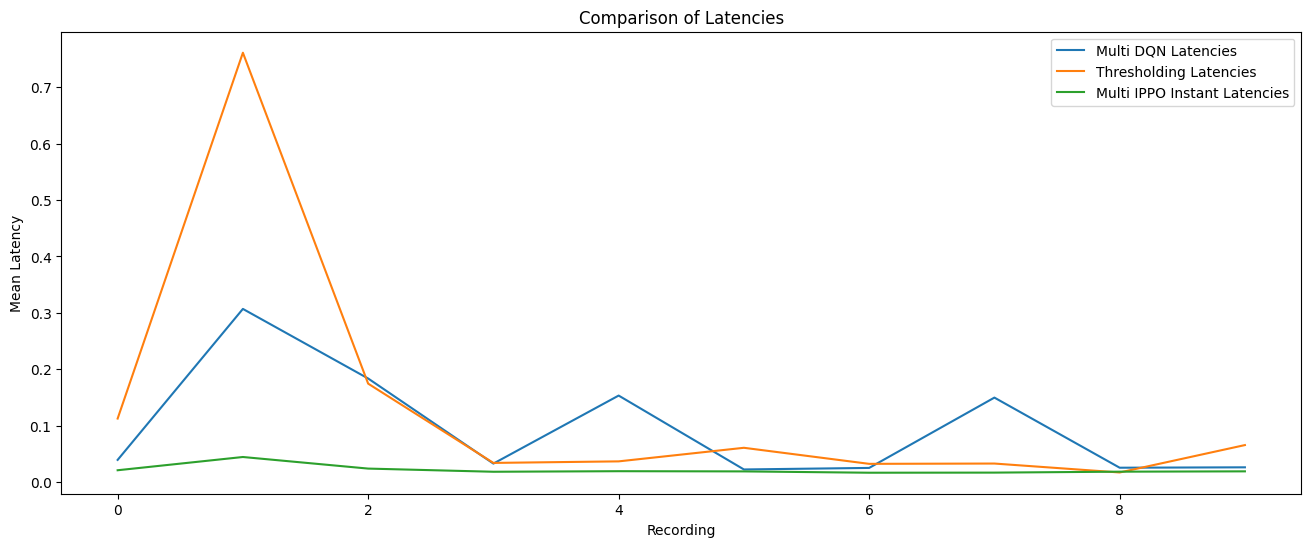

In [8]:
plt.figure(figsize=(16, 6))
plt.plot(mdqn_latenices, label='Multi DQN Latencies')
# plt.plot(ddpg_latenices, label='Multi DDPG Latencies')
plt.plot(t_latencies, label='Thresholding Latencies')
plt.plot(ppo_latencies, label='Multi IPPO Instant Latencies')

plt.xlabel('Recording')
plt.ylabel('Mean Latency')
plt.title('Comparison of Latencies')
plt.legend()

plt.show()

In [11]:
print(f"Thresholding: {np.mean(t_latencies[3:])}\nMDQN: {np.mean(mdqn_latenices[3:])}\nPPO: {np.mean(ppo_latencies[3:])}")

Thresholding: 0.040013980952380956
MDQN: 0.0622526380952381
PPO: 0.018321161904761907


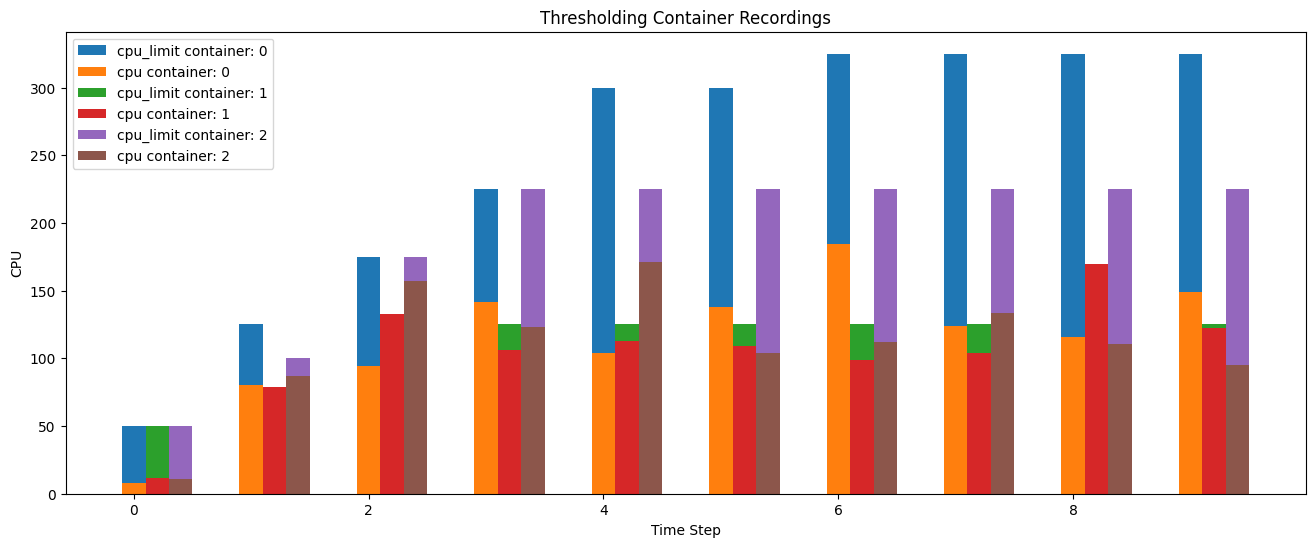

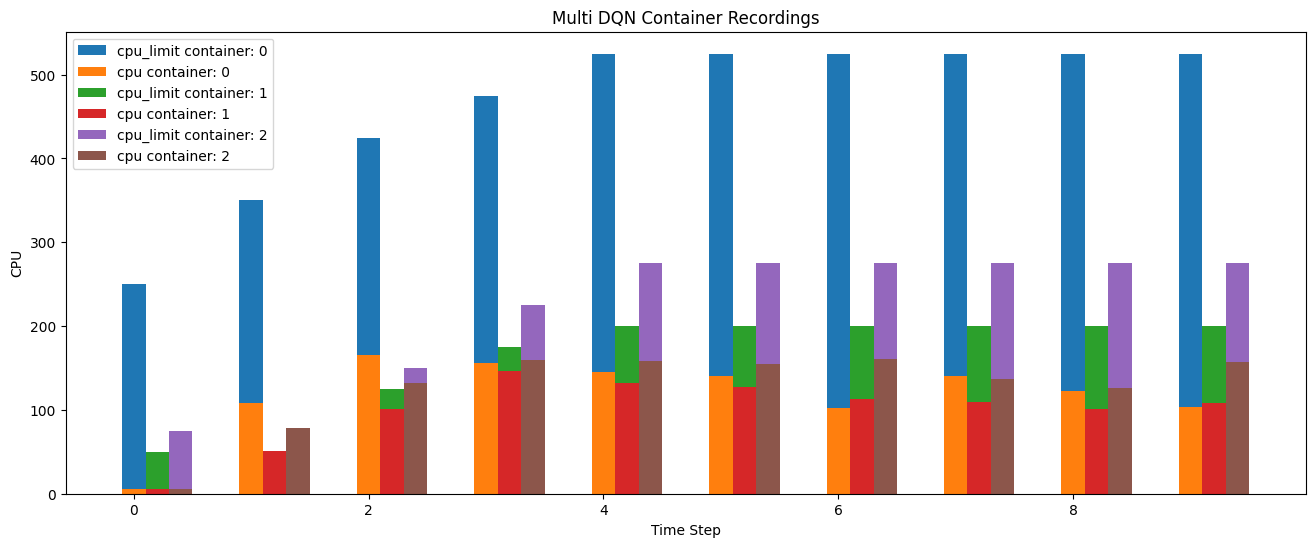

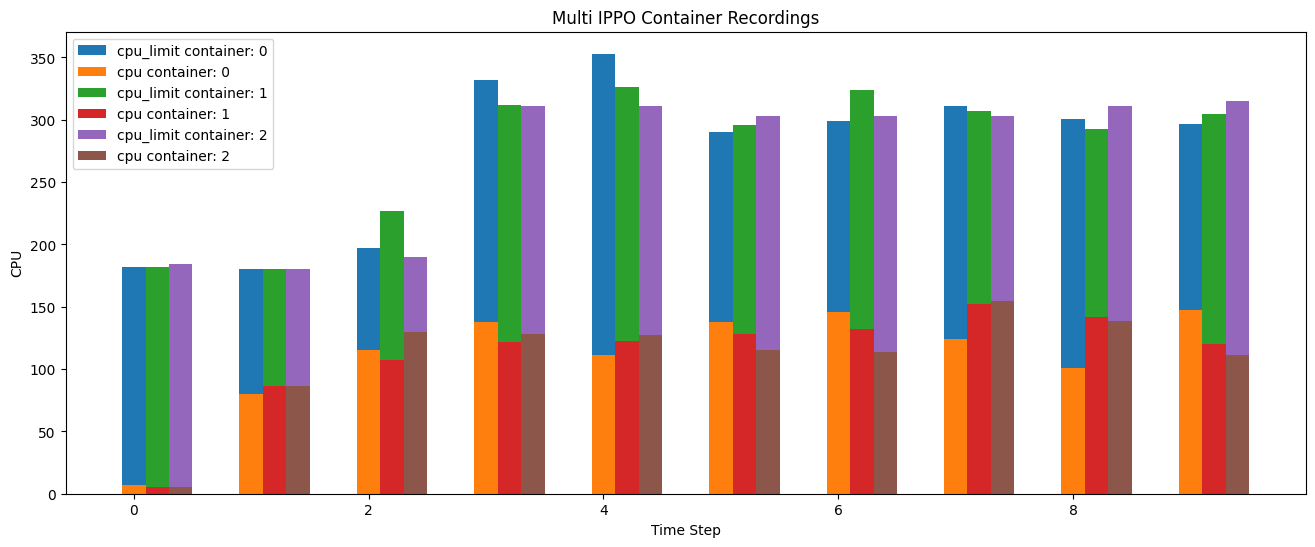

In [12]:
time_axis = range(len(t_container_recordings))

plt.figure(figsize=(16, 6))
for i, container_recordings in enumerate(zip(*t_container_recordings)):
    cpu_limits, cpu, _ = zip(*container_recordings)
    plt.bar(np.array(time_axis) + i*0.2, cpu_limits, width=0.2, label=f'cpu_limit container: {i}')
    plt.bar(np.array(time_axis) + i*0.2, cpu, width=0.2, label=f'cpu container: {i}')
plt.xlabel('Time Step')
plt.ylabel('CPU')
plt.title('Thresholding Container Recordings')
plt.legend()
plt.show()

plt.figure(figsize=(16, 6))
for i, container_recordings in enumerate(zip(*mdqn_container_recordings)):
    cpu_limits, cpu, _ = zip(*container_recordings)
    plt.bar(np.array(time_axis) + i*0.2, cpu_limits, width=0.2, label=f'cpu_limit container: {i}')
    plt.bar(np.array(time_axis) + i*0.2, cpu, width=0.2, label=f'cpu container: {i}')
plt.xlabel('Time Step')
plt.ylabel('CPU')
plt.title('Multi DQN Container Recordings')
plt.legend()
plt.show()

# plt.figure(figsize=(16, 6))
# for i, container_recordings in enumerate(zip(*ddpg_container_recordings)):
#     cpu_limits, cpu, _ = zip(*container_recordings)
#     plt.bar(np.array(time_axis) + i*0.2, cpu_limits, width=0.2, label=f'cpu_limit container: {i}')
#     plt.bar(np.array(time_axis) + i*0.2, cpu, width=0.2, label=f'cpu container: {i}')
# plt.xlabel('Time Step')
# plt.ylabel('CPU')
# plt.title('Multi DDPG Container Recordings')
# plt.legend()
# plt.show()

plt.figure(figsize=(16, 6))
for i, container_recordings in enumerate(zip(*ppo_container_recordings)):
    cpu_limits, cpu, _ = zip(*container_recordings)
    plt.bar(np.array(time_axis) + i*0.2, cpu_limits, width=0.2, label=f'cpu_limit container: {i}')
    plt.bar(np.array(time_axis) + i*0.2, cpu, width=0.2, label=f'cpu container: {i}')
plt.xlabel('Time Step')
plt.ylabel('CPU')
plt.title('Multi IPPO Container Recordings')
plt.legend()
plt.show()